In [8]:
import mindspore

In [9]:
from mindvision.dataset import Mnist



In [10]:
# 下载并处理MNIST数据集
download_train = Mnist(path="./mnist", split="train", batch_size=32, repeat_num=1, shuffle=True, resize=32, download=True)

download_eval = Mnist(path="./mnist", split="test", batch_size=32, resize=32, download=True)

dataset_train = download_train.run()
dataset_eval = download_eval.run()


[WARNING] ME(8748:16720,MainProcess):2024-05-06-12:58:26.223.13 [mindspore\dataset\core\validator_helpers.py:744] 'Resize' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'Resize' from mindspore.dataset.vision instead.
[WARNING] ME(8748:16720,MainProcess):2024-05-06-12:58:26.253.22 [mindspore\dataset\core\validator_helpers.py:744] 'Rescale' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'Rescale' from mindspore.dataset.vision instead.
[WARNING] ME(8748:16720,MainProcess):2024-05-06-12:58:26.263.25 [mindspore\dataset\core\validator_helpers.py:744] 'Rescale' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'Rescale' from mindspore.dataset.vision instead.
[WARNING] ME(8748:16720,MainProcess):2024-05-06-12:58:26.263.25 [mindspore\dataset\core\validator_helpers.py:744] 'HWC2CHW' fr

In [11]:
# 定义LeNet网络模型如下
from mindvision.classification.models import lenet

network = lenet(num_classes=10, pretrained=False)


In [12]:
import mindspore.nn as nn

# 定义损失函数
net_loss = nn.SoftmaxCrossEntropyWithLogits(sparse=True, reduction='mean')

# 定义优化器函数
net_opt = nn.Momentum(network.trainable_params(), learning_rate=0.01, momentum=0.9)


In [13]:
from mindspore.train.callback import ModelCheckpoint, CheckpointConfig

# 设置模型保存参数，模型训练保存参数的step为1875
config_ck = CheckpointConfig(save_checkpoint_steps=1875, keep_checkpoint_max=10)

# 应用模型保存参数
ckpoint = ModelCheckpoint(prefix="lenet", directory="./lenet", config=config_ck)


In [14]:
# 通过MindSpore提供的model.train接口可以方便地进行网络的训练，LossMonitor可以监控训练过程中loss值的变化
from mindvision.engine.callback import LossMonitor
from mindspore.train import Model

# 初始化模型参数
model = Model(network, loss_fn=net_loss, optimizer=net_opt, metrics={'accuracy'})

# 训练网络模型，并保存为lenet-1_1875.ckpt文件
model.train(10, dataset_train, callbacks=[ckpoint, LossMonitor(0.01, 1875)])


Epoch:[  0/ 10], step:[ 1875/ 1875], loss:[0.008/0.421], time:9.093 ms, lr:0.01000
Epoch time: 10483.270 ms, per step time: 5.591 ms, avg loss: 0.421
Epoch:[  1/ 10], step:[ 1875/ 1875], loss:[0.003/0.060], time:11.358 ms, lr:0.01000
Epoch time: 10212.165 ms, per step time: 5.446 ms, avg loss: 0.060
Epoch:[  2/ 10], step:[ 1875/ 1875], loss:[0.008/0.040], time:10.150 ms, lr:0.01000
Epoch time: 10229.906 ms, per step time: 5.456 ms, avg loss: 0.040
Epoch:[  3/ 10], step:[ 1875/ 1875], loss:[0.042/0.033], time:9.025 ms, lr:0.01000
Epoch time: 10247.235 ms, per step time: 5.465 ms, avg loss: 0.033
Epoch:[  4/ 10], step:[ 1875/ 1875], loss:[0.004/0.026], time:10.205 ms, lr:0.01000
Epoch time: 10277.554 ms, per step time: 5.481 ms, avg loss: 0.026
Epoch:[  5/ 10], step:[ 1875/ 1875], loss:[0.043/0.022], time:8.834 ms, lr:0.01000
Epoch time: 10149.154 ms, per step time: 5.413 ms, avg loss: 0.022
Epoch:[  6/ 10], step:[ 1875/ 1875], loss:[0.019/0.018], time:10.058 ms, lr:0.01000
Epoch time: 1

In [15]:
# 通过模型运行测试数据集得到的结果，验证模型的泛化能力：
# 使用model.eval接口读入测试数据集
# 使用保存后的模型参数进行推理
acc = model.eval(dataset_eval)

print("{}".format(acc))


{'accuracy': 0.9898838141025641}


In [16]:
from mindspore import load_checkpoint, load_param_into_net

# 加载已经保存的用于测试的模型
param_dict = load_checkpoint("./lenet/lenet-1_1875.ckpt")
# 加载参数到网络中
load_param_into_net(network, param_dict)


([],
 ['global_step',
  'learning_rate',
  'momentum',
  'moments.backbone.conv1.weight',
  'moments.backbone.conv2.weight',
  'moments.backbone.fc1.weight',
  'moments.backbone.fc1.bias',
  'moments.backbone.fc2.weight',
  'moments.backbone.fc2.bias',
  'moments.backbone.fc3.weight',
  'moments.backbone.fc3.bias'])

[WARNING] ME(8748:16720,MainProcess):2024-05-06-13:04:48.309.58 [mindspore\dataset\core\validator_helpers.py:744] 'Resize' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'Resize' from mindspore.dataset.vision instead.
[WARNING] ME(8748:16720,MainProcess):2024-05-06-13:04:48.319.61 [mindspore\dataset\core\validator_helpers.py:744] 'Rescale' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'Rescale' from mindspore.dataset.vision instead.
[WARNING] ME(8748:16720,MainProcess):2024-05-06-13:04:48.323.07 [mindspore\dataset\core\validator_helpers.py:744] 'Rescale' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'Rescale' from mindspore.dataset.vision instead.
[WARNING] ME(8748:16720,MainProcess):2024-05-06-13:04:48.329.63 [mindspore\dataset\core\validator_helpers.py:744] 'HWC2CHW' fr

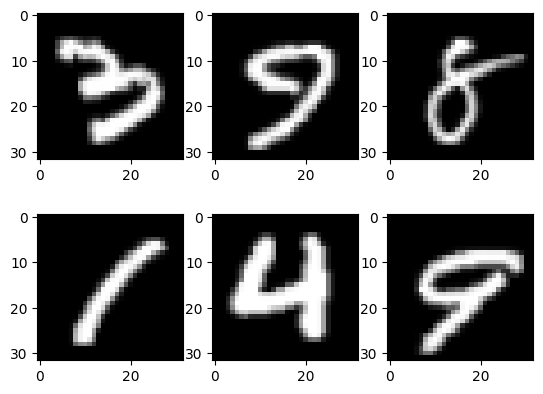

Predicted: "[3 9 8 1 4 9]", Actual: "[3 9 8 1 4 9]"


In [17]:
import numpy as np
from mindspore import Tensor
import matplotlib.pyplot as plt

mnist = Mnist("./mnist", split="train", batch_size=6, resize=32)
dataset_infer = mnist.run()
ds_test = dataset_infer.create_dict_iterator()
data = next(ds_test)
images = data["image"].asnumpy()
labels = data["label"].asnumpy()

plt.figure()
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.imshow(images[i-1][0], interpolation="None", cmap="gray")
plt.show()

# 使用函数model.predict预测image对应分类
output = model.predict(Tensor(data['image']))
predicted = np.argmax(output.asnumpy(), axis=1)

# 输出预测分类与实际分类
print(f'Predicted: "{predicted}", Actual: "{labels}"')
# 从下面打印结果可以看出，预测值与目标值完全一致。